
# Statistical & Machine Learning Approaches for Marketing

## Homework Session 3

### Chapter 5 Exercise 3 (Page 198, Conceptual)

We now review k-fold cross-validation.

(a) Explain how k-fold cross-validation is implemented.

The data is divided into 'k' number of equal parts. 
The Machine Learning model is trained 'k' times, each time on different sets of 'k-1' parts of the data. The one exluded part is used to test the model and is called as the validation data. 
The accuracy is calculated 'k' times for each of the 'k' parts of data as test data and the model accuracy is the mean of all accuracies.

(b) What are the advantages and disadvantages of k-fold cross-validation relative to:

i. The validation set approach?

ii. LOOCV?

(i) Compared to validation set approach, k-fold is more accuracte and the variance is low. All the data is fitted and hence, the model is less underfitted than a validation set approach.

(ii) LOOCV needs lots of computation power as it fits a huge number of ML models. The randomness of validation data in k-fold cross validation allows a more accurate result, as LOOCV can be fitted on the same data multiple times.

### Chapter 5 Exercise 8 (Page 200, Applied)

In [1]:
#We will now perform cross-validation on a simulated data set
#Exercise 8A: Generate a simulated data set as follows:
set.seed (1)
x=rnorm (100)
y=x-2* x^2+ rnorm (100)
y

#Equation for above model:
# Y = X − 2*X^2 + ε.

[1]  -2.03170924   0.15830946  -3.14310062  -3.33653210  -0.54222762
  [6]  -0.39951785   0.72896237   0.55825219   0.29691838   1.19026356
 [11]  -3.69491989  -0.37575699   0.03916194 -12.67518742  -1.61338897
 [16]  -0.44177960  -0.33670738  -1.11693068  -0.03339898  -0.28886672
 [21]  -1.27601891   0.90170074  -0.15113430 -10.08394857  -0.24873291
 [26]   0.65023670  -0.27790439  -5.83461170  -1.61706548  -0.25567901
 [31]  -2.27318026  -0.71281285   0.61858925  -1.57798909  -4.86308774
 [36]  -2.29588536  -1.00619522  -0.59462946  -1.97218105  -0.45859548
 [41]  -2.13301905   0.79483735  -1.93952495  -0.52661504  -2.75344461
 [46]  -2.45941295   2.18590849  -0.39535717  -1.42389009  -2.31219946
 [51]   0.53131640  -1.37973884  -0.20967397  -4.60964725  -4.16155047
 [56]  -6.93875991   0.36310410  -3.84583556  -1.46386813   1.69775653
 [61]  -8.70881760  -0.28096666   0.79674163   0.91285657  -2.46742638
 [66]   2.32360970  -8.57573696  -4.25464189  -0.03811944  -7.06033293
 [71]   2.33126930  -1.61219193   0.32175180  -2.75632734  -4.73082765
 [76]   0.08683839  -0.04866764   2.07634792   1.09068050  -0.07668244
 [81]  -2.44676041   0.81217044  -1.37776614  -7.63332842   0.40942478
 [86]  -0.04751613   0.26732462  -1.25532164  -0.33402078  -0.80169423
 [91]  -1.30827996  -1.30800969  -2.26441402   0.54998851  -4.65733016
 [96]  -1.11331216  -3.09480984  -2.24637935  -3.81199002  -1.30269301

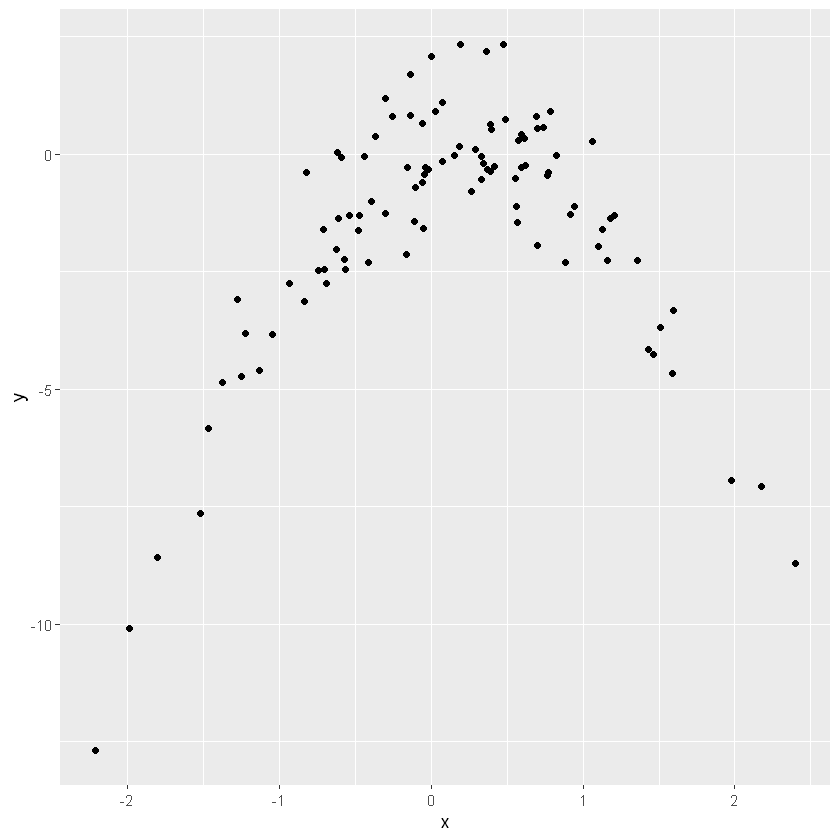

In [2]:
#Exercise 8B: Create a scatterplot of X against Y
library(ggplot2)
ggplot(mapping = aes(x, y)) + 
geom_point() 

#Observation: there is a quadratic relationship between x and y

In [3]:
#Exercise 8C: Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares
#Exercises 8Ci: Y = β0 + β1X + ǫ
library(boot)

set.seed(1)
Locdata <- data.frame(x, y)
fit.glm.01 <- glm(y ~ x)
round(cv.glm(Locdata, fit.glm.01)$delta[1], 3)

#Exercise 8Cii: Y = β0 + β1X + β2X2 + ǫ
fit.glm.02<- glm(y ~ poly(x, 2))
round(cv.glm(Locdata, fit.glm.02)$delta[1], 3)

#Exercise 8Ciii: Y = β0 + β1X + β2X2 + β3X3 + ǫ
fit.glm.03 <- glm(y ~ poly(x, 3))
round(cv.glm(Locdata, fit.glm.03)$delta[1], 3)

#Exercise 8Civ:Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ
fit.glm.04 <- glm(y ~ poly(x, 4))
round(cv.glm(Locdata, fit.glm.04)$delta[1], 3)

#Exercise 8D: Repeat (c) using another random seed, and report your results
#First Exercise 8ci:
set.seed(20)
fit.glm.01 <- glm(y ~ x)
round(cv.glm(Locdata, fit.glm.01)$delta[1], 3)

#Second Exercise 8cii:
fit.glm.02 <- glm(y ~ poly(x, 2))
round(cv.glm(Locdata, fit.glm.02)$delta[1],3)

#Third Exercise 8ciiii:
fit.glm.03 <- glm(y ~ poly(x, 3))
round(cv.glm(Locdata, fit.glm.03)$delta[1], 3)

#Fourth  Exercise 8civ:
fit.glm.04 <- glm(y ~ poly(x, 4))
round(cv.glm(Locdata, fit.glm.04)$delta[1], 3)

#Observations:
#They are both the same results. However, LOOCV evaluates n folds of each observations.

[1] 7.288

[1] 0.937

[1] 0.957

[1] 0.954

[1] 7.288

[1] 0.937

[1] 0.957

[1] 0.954

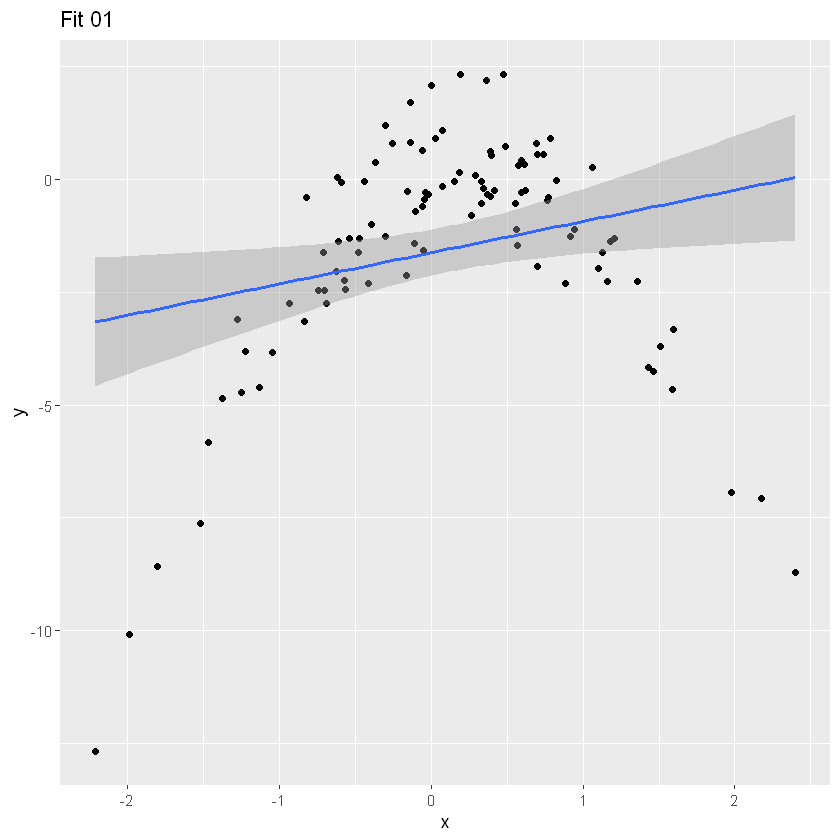

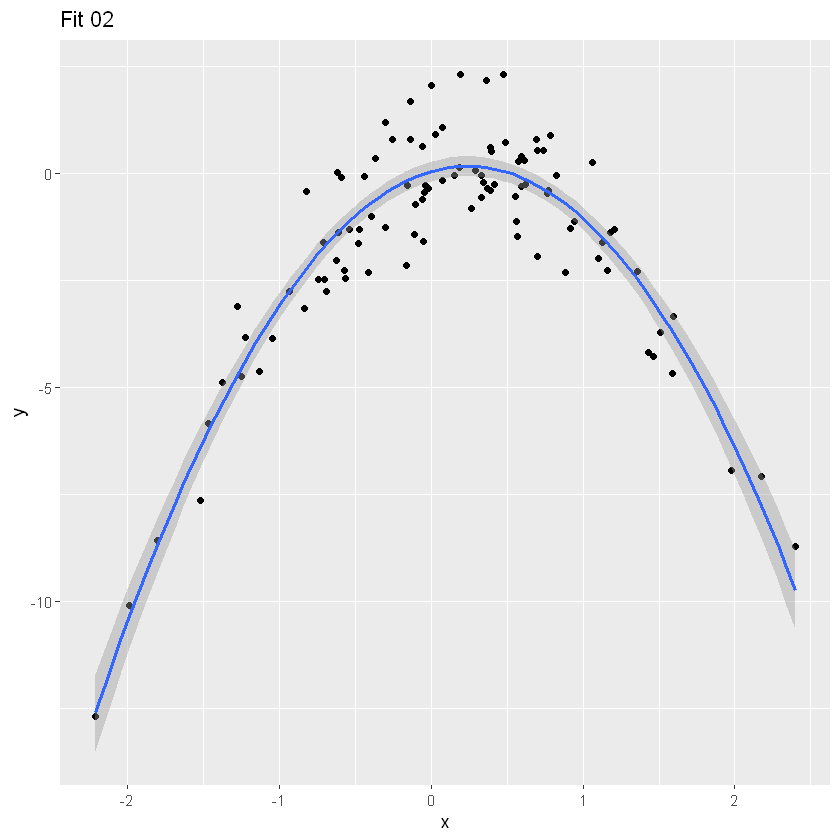

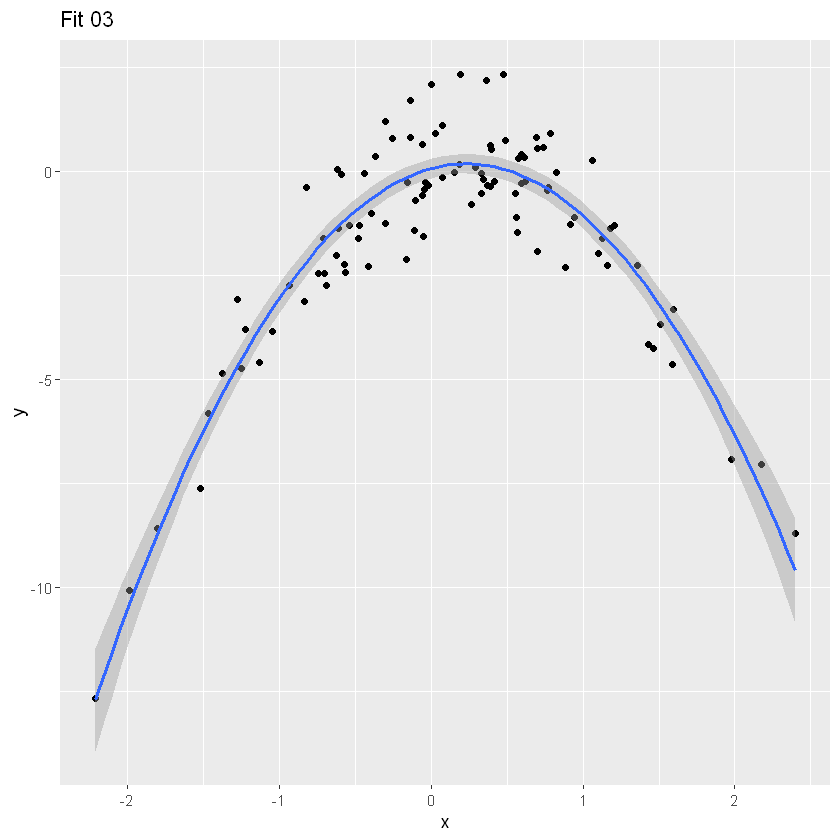

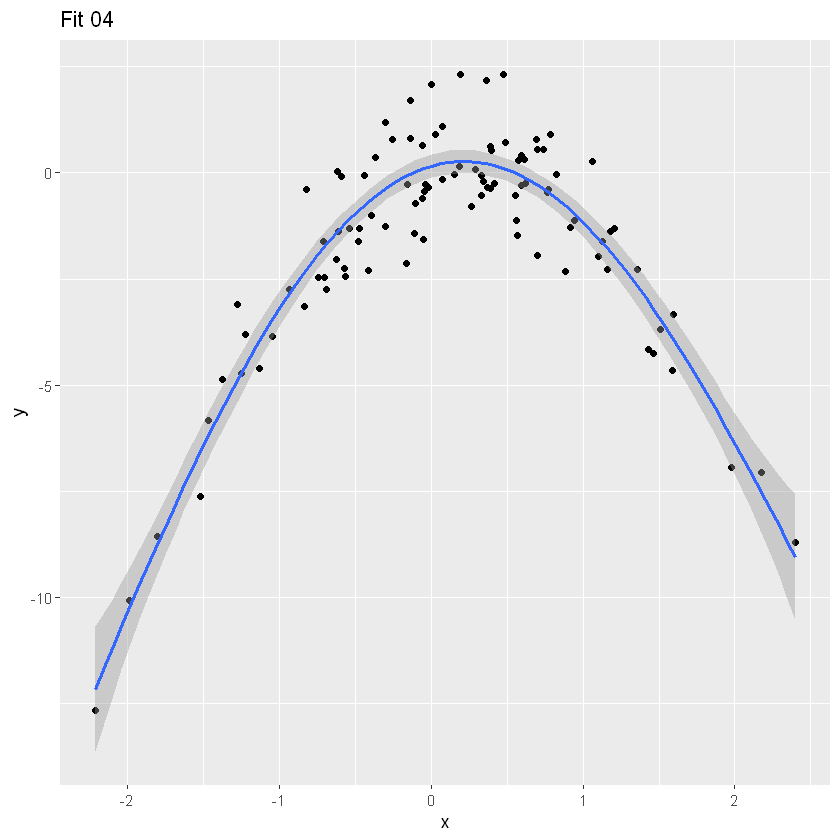

In [4]:
#Exercise 8E: Which of the models in (c) had the smallest LOOCV error?
graph1 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ x") + 
ggtitle("Fit 01")
graph1

graph2 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 2)") +
ggtitle("Fit 02")
graph2

graph3 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 3)") +
ggtitle("Fit 03")
graph3

graph4 <- ggplot(mapping = aes(x, y)) + 
geom_point() +
geom_smooth(method = glm, formula = "y ~ poly(x, 4)") +
ggtitle("Fit 04")
graph4

#Observation:Although the quadratic model has the smallest LOOCV error, the second, third, and fourth order polynomial fits perform slightly differently.

In [5]:
#Exercise 8F: Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares.
#Exercise 8Fi: Y=β0+β1X+ϵ
summary(fit.glm.01)

#Exercise 8Fii: Y = β0 + β1X + β2X2 + ǫ
summary(fit.glm.02)

#Exercise 8Fiii: Y = β0 + β1X + β2X2 + β3X3 + ǫ
summary(fit.glm.03)

#Exercise 8Fiv: Y = β0 + β1X + β2X2 + β3X3 + β4X4 + ǫ
summary(fit.glm.04)

#Observation: 
#The p-values show that the linear and quadratic terms are statistically significant, but the cubic and fourth degree terms are not.

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows


Call:
glm(formula = y ~ x)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-9.5161  -0.6800   0.6812   1.5491   3.8183  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6254     0.2619  -6.205 1.31e-08 ***
x             0.6925     0.2909   2.380   0.0192 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 6.760719)

    Null deviance: 700.85  on 99  degrees of freedom
Residual deviance: 662.55  on 98  degrees of freedom
AIC: 478.88

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 2))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9650  -0.6254  -0.1288   0.5803   2.2700  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.5500     0.0958  -16.18  < 2e-16 ***
poly(x, 2)1   6.1888     0.9580    6.46 4.18e-09 ***
poly(x, 2)2 -23.9483     0.9580  -25.00  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9178258)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  89.029  on 97  degrees of freedom
AIC: 280.17

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 3))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9765  -0.6302  -0.1227   0.5545   2.2843  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09626 -16.102  < 2e-16 ***
poly(x, 3)1   6.18883    0.96263   6.429 4.97e-09 ***
poly(x, 3)2 -23.94830    0.96263 -24.878  < 2e-16 ***
poly(x, 3)3   0.26411    0.96263   0.274    0.784    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9266599)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  88.959  on 96  degrees of freedom
AIC: 282.09

Number of Fisher Scoring iterations: 2



Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0550  -0.6212  -0.1567   0.5952   2.2267  

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.55002    0.09591 -16.162  < 2e-16 ***
poly(x, 4)1   6.18883    0.95905   6.453 4.59e-09 ***
poly(x, 4)2 -23.94830    0.95905 -24.971  < 2e-16 ***
poly(x, 4)3   0.26411    0.95905   0.275    0.784    
poly(x, 4)4   1.25710    0.95905   1.311    0.193    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 0.9197797)

    Null deviance: 700.852  on 99  degrees of freedom
Residual deviance:  87.379  on 95  degrees of freedom
AIC: 282.3

Number of Fisher Scoring iterations: 2


### Chapter 6 Exercise 1 (Page 259, Conceptual)

We perform best subset, forward step-wise, and backward step-wise selection on a single data set. For each approach, we obtain p+1 models, containing 0,1,2,...,p predictors. Explain your answers:

(a) Which of the three models with k predictors has the smallest training RSS?

The smallest training RSS will be for the model with best subset. This is because the model will be chosen after considering all the possible models with k parameters. This is not true for either backward stepwise or forward stepwise.

(b) Which of the three models with k predictors has the smallest test RSS?

Cannot be determined.

(c) True or False:

i. The predictors in the k-variable model identified by forward step-wise are a subset of the predictors in the (k+1)- variable model identified by forward step-wise selection.

TRUE

ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k+1) -variable model identified by backward stepwise selection.

TRUE

iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k+1) -variable model identified by forward step-wise selection.

FALSE

iv. The predictors in the k-variable model identified by forward step-wise are a subset of the predictors in the (k+1) -variable model identified by backward step-wise selection.

FALSE

v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k+1) -variable model identified by best subset selection.

FALSE

### Chapter 6 Exercise 9 (Page 263, Applied)

In this exercise, we will predict the number of applications received using the other variables in the College dataset.

(a) Split the data set into a training set and a test set.

In [12]:
library(ISLR)
data(College)
set.seed(11)
train <- sample(dim(College)[1], dim(College)[1] / 2)
test <- -train
College_train <- College[train, ]
College_test <- College[test, ]

(b) Fit a linear model using least squares on the training set, and report the test error obtained.

In [13]:
model_a <- lm(Apps ~ ., data = College_train)
predictions <- predict(model_a, College_test)
# sum(predictions == College_test$Apps) / length(predictions)
mean((predictions - College_test$Apps)^2)

[1] 1026096

(c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [14]:
library(glmnet)
train_mat <- model.matrix(Apps ~ ., data = College_train)
test_mat <- model.matrix(Apps ~ ., data = College_test)
grid <- 10 ^ seq(4, -2, length = 100)
model_ridge <- glmnet(train_mat, College_train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
cv_ridge <- cv.glmnet(train_mat, College_train$Apps, alpha = 0, lambda = grid, thresh = 1e-12)
bestlam_ridge <- cv_ridge$lambda.min
bestlam_ridge

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] 0.01

In [15]:
predictions <- predict(model_ridge, s = bestlam_ridge, newx = test_mat)
mean((predictions - College_test$Apps)^2)

[1] 1026069

The error is almost the same.

(d) Fit a lasso model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [16]:
model_lasso <- glmnet(train_mat, College_train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
cv.lasso <- cv.glmnet(train_mat, College_train$Apps, alpha = 1, lambda = grid, thresh = 1e-12)
bestlam.lasso <- cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

In [17]:
predictions <- predict(model_lasso, s = bestlam.lasso, newx = test_mat)
mean((predictions - College_test$Apps)^2)

[1] 1026036

The error is again almost the same.

(e) Fit a PCR model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

(f) Fit a PLS model on the training set, with M chosen by cross-validation. Report the test error obtained, along with the value of M selected by cross-validation.

In [18]:
library(pls)
model_pcr <- pcr(Apps ~ ., data = College_train, scale = TRUE, validation = "CV")
# validationplot(model_pcr, val.type = "MSEP")
predictions <- predict(model_pcr, College_test, ncomp = 10)
mean((predictions - College_test$Apps)^2)

Warning message:
"package 'pls' was built under R version 3.6.3"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



[1] 1867486

The error is very high.

(g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

All models, except PCR, predict college applications with high accuracy.

### Chapter 7 Exercise 9 (Page 299, Applied)

This question uses the variables dis(the weighted mean of distances to five Boston employment centers) and nox(nitrogen oxides concentration in parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.

(a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits.

In [19]:
library(MASS) 
library(tidyverse) 
library(ggplot2) 
library(ggthemes)
library(broom) 
library(knitr) 
library(caret)
theme_set(theme_tufte(base_size = 14) + theme(legend.position = 'top'))
data('Boston')

model <- lm(nox ~ poly(dis, 3), data = Boston)
tidy(model) %>%
    kable(digits = 3)

Warning message:
"package 'MASS' was built under R version 3.6.3"Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.3.3     v purrr   0.3.2
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x purrr::accumulate() masks foreach::accumulate()
x tidyr::expand()     masks Matrix::expand()
x dplyr::filter()     masks stats::filter()
x dplyr::lag()        masks stats::lag()
x tidyr



|term          | estimate| std.error| statistic| p.value|
|:-------------|--------:|---------:|---------:|-------:|
|(Intercept)   |    0.555|     0.003|   201.021|       0|
|poly(dis, 3)1 |   -2.003|     0.062|   -32.271|       0|
|poly(dis, 3)2 |    0.856|     0.062|    13.796|       0|
|poly(dis, 3)3 |   -0.318|     0.062|    -5.124|       0|

(b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

Warning message:
"`data_frame()` is deprecated as of tibble 1.1.0.
Please use `tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated."

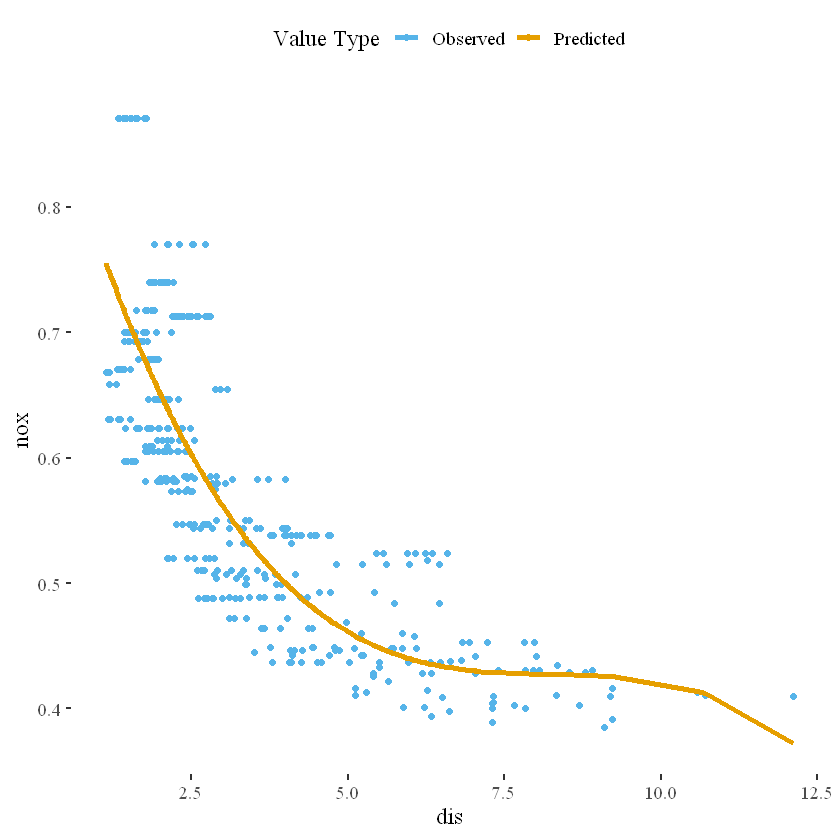

In [20]:
errors <- list()
models <- list()
pred_df <- data_frame(V1 = 1:506)
for (i in 1:9) {
    models[[i]] <- lm(nox ~ poly(dis, i), data = Boston)
    preds <- predict(models[[i]])
    pred_df[[i]] <- preds
    errors[[i]] <- sqrt(mean((Boston$nox - preds)^2))
}

errors <- unlist(errors)

names(pred_df) <- paste('Level', 1:9)
Boston %>%
    mutate(pred = predict(model, Boston)) %>%
    ggplot() +
    geom_point(aes(dis, nox, col = '1')) +
    geom_line(aes(dis, pred, col = '2'), size = 1.5) +
    scale_color_manual(name = 'Value Type',
                       labels = c('Observed', 'Predicted'),
                       values = c('#56B4E9', '#E69F00'))

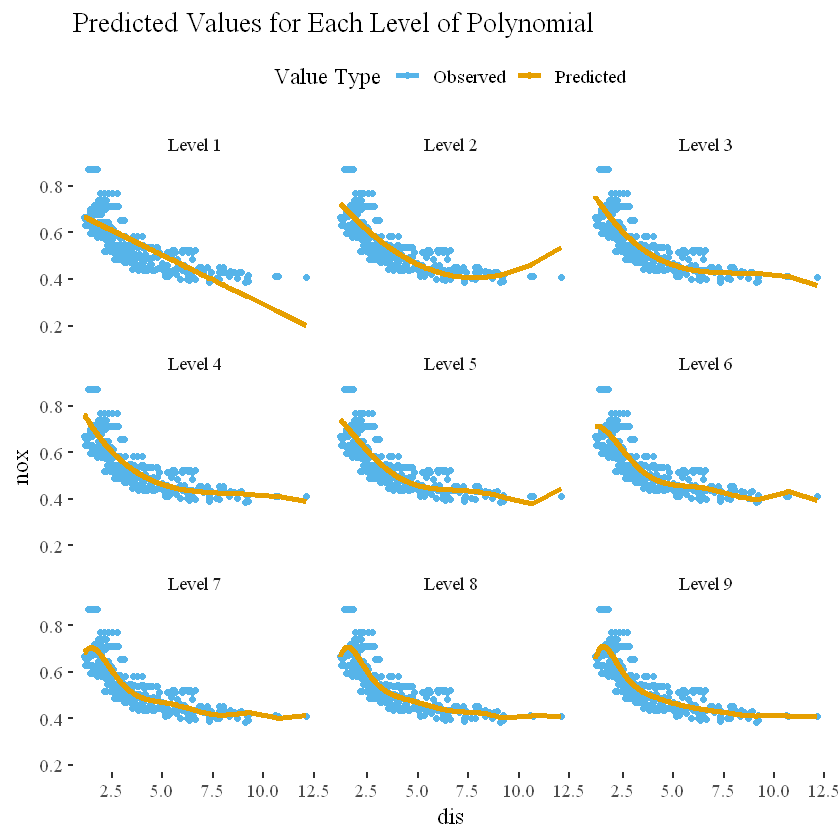

In [21]:
Boston %>%
    cbind(pred_df) %>%
    gather(Polynomial, prediction, -(1:14)) %>%
    mutate(Polynomial = factor(Polynomial, 
                               levels = unique(as.character(Polynomial)))) %>%
    ggplot() + 
    ggtitle('Predicted Values for Each Level of Polynomial') +
    geom_point(aes(dis, nox, col = '1')) + 
    geom_line(aes(dis, prediction, col = '2'), size = 1.5) +
    scale_color_manual(name = 'Value Type',
                       labels = c('Observed', 'Predicted'),
                       values = c('#56B4E9', '#E69F00')) +
    facet_wrap(~ Polynomial, nrow = 3)

(c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

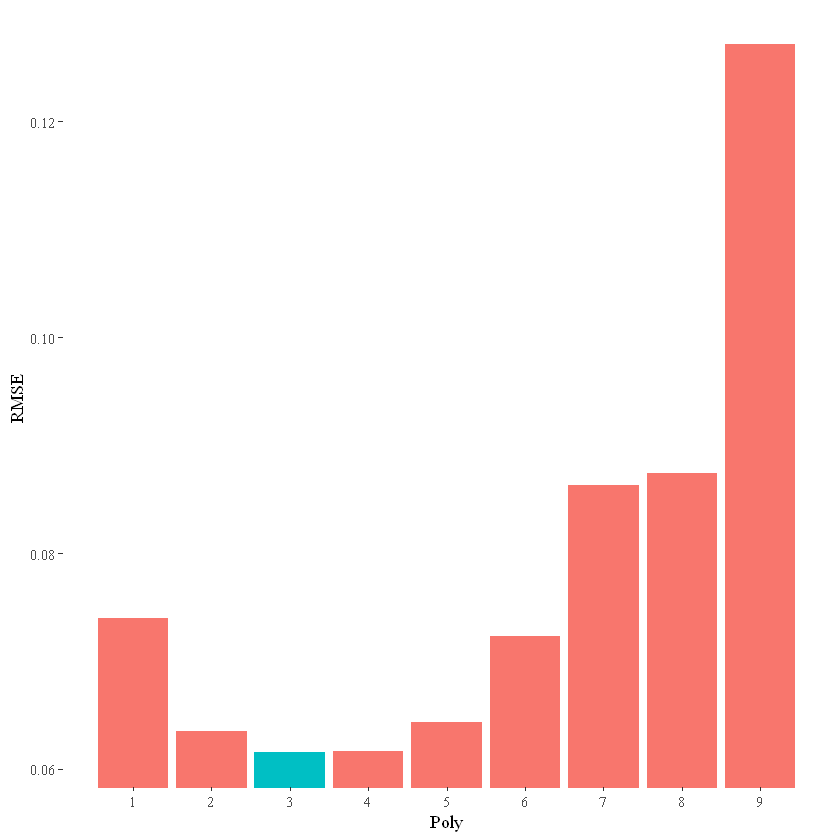

In [22]:
errors <- list()

folds <- sample(1:10, 506, replace = TRUE)
errors <- matrix(NA, 10, 9)
for (k in 1:10) {
    for (i in 1:9) {
        model <- lm(nox ~ poly(dis, i), data = Boston[folds != k,])
        pred <- predict(model, Boston[folds == k,])
        errors[k, i] <- sqrt(mean((Boston$nox[folds == k] - pred)^2))
    }
}

errors <- apply(errors, 2, mean)

data_frame(RMSE = errors) %>%
    mutate(Poly = row_number()) %>%
    ggplot(aes(Poly, RMSE, fill = Poly == which.min(errors))) +
    geom_col() + theme_tufte() + guides(fill = FALSE) +
    scale_x_continuous(breaks = 1:9) +
    coord_cartesian(ylim = range(errors))

(d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

In [23]:
require(splines)
model <- lm(nox ~ bs(dis, df = 4), data = Boston)

kable(tidy(model), digits = 3)

Loading required package: splines




|term             | estimate| std.error| statistic| p.value|
|:----------------|--------:|---------:|---------:|-------:|
|(Intercept)      |    0.734|     0.015|    50.306|   0.000|
|bs(dis, df = 4)1 |   -0.058|     0.022|    -2.658|   0.008|
|bs(dis, df = 4)2 |   -0.464|     0.024|   -19.596|   0.000|
|bs(dis, df = 4)3 |   -0.200|     0.043|    -4.634|   0.000|
|bs(dis, df = 4)4 |   -0.389|     0.046|    -8.544|   0.000|

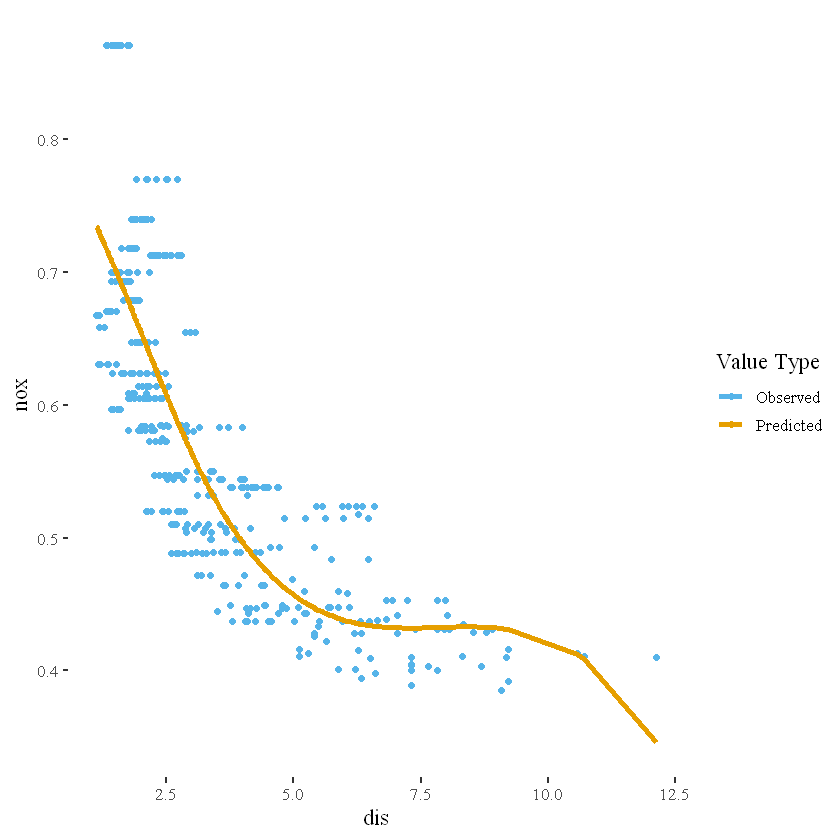

In [24]:
Boston %>%
    mutate(pred = predict(model)) %>%
    ggplot() +
    geom_point(aes(dis, nox, col = '1')) + 
    geom_line(aes(dis, pred, col = '2'), size = 1.5) +
    scale_color_manual(name = 'Value Type',
                       labels = c('Observed', 'Predicted'),
                       values = c('#56B4E9', '#E69F00')) +
    theme_tufte(base_size = 13)



(e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

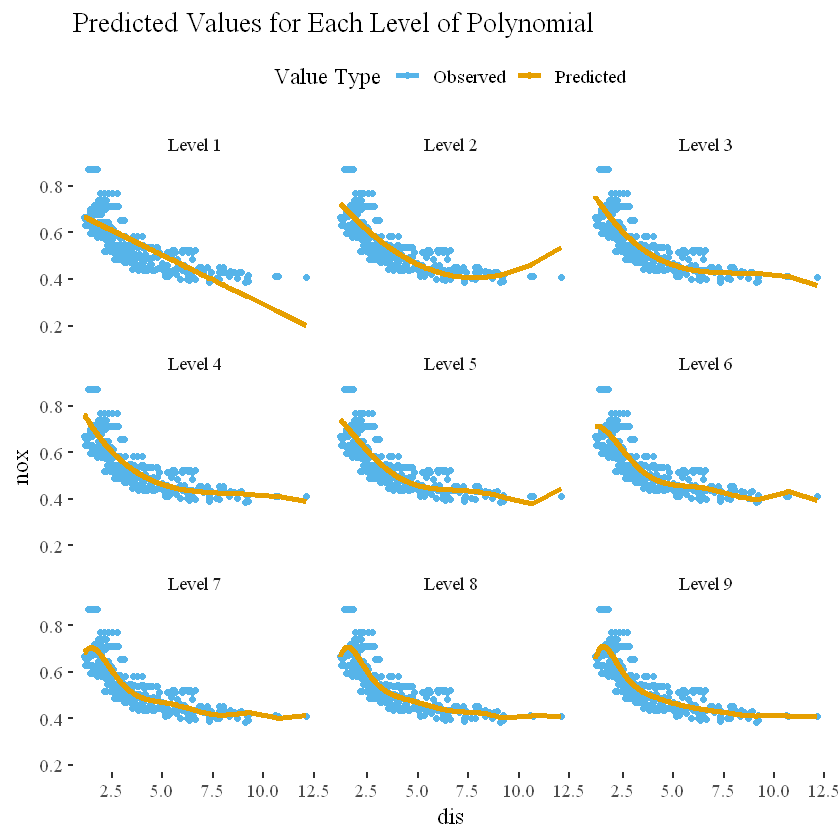

In [25]:
Boston %>%
    cbind(pred_df) %>%
    gather(df, prediction, -(1:14)) %>%
    mutate(df = factor(df, levels = unique(as.character(df)))) %>%
    ggplot() + ggtitle('Predicted Values for Each Level of Polynomial') +
    geom_point(aes(dis, nox, col = '1')) + 
    geom_line(aes(dis, prediction, col = '2'), size = 1.5) +
    scale_color_manual(name = 'Value Type',
                       labels = c('Observed', 'Predicted'),
                       values = c('#56B4E9', '#E69F00')) +
    facet_wrap(~ df, nrow = 3)

(f) Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i):
"'df' was too small; have used 3"Warning message in bs(nox, df = i)

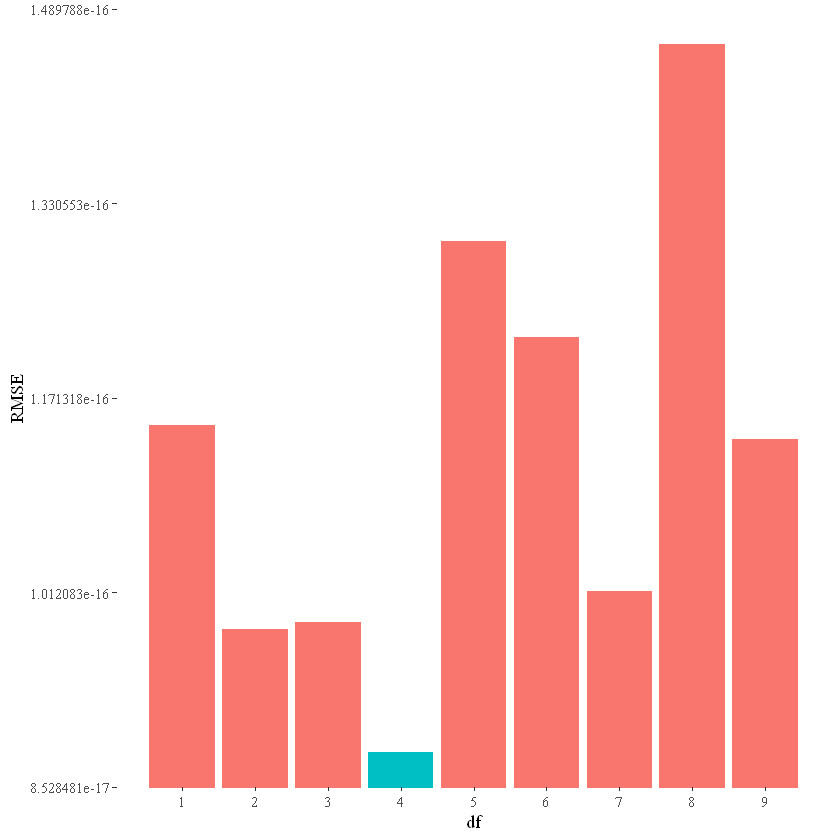

In [26]:
folds <- sample(1:10, size = 506, replace = TRUE)
errors <- matrix(NA, 10, 9)
models <- list()
for (k in 1:10) {
    for (i in 1:9) {
        models[[i]] <- lm(nox ~ bs(nox, df = i), data = Boston[folds != k,])
        pred <- predict(models[[i]], Boston[folds == k,])
        errors[k, i] <- sqrt(mean((Boston$nox[folds == k] - pred)^2))
    }
}

errors <- apply(errors, 2, mean)

data_frame(RMSE = errors) %>%
    mutate(df = row_number()) %>%
    ggplot(aes(df, RMSE, fill = df == which.min(errors))) +
    geom_col() + theme_tufte() + guides(fill = FALSE) +
    scale_x_continuous(breaks = 1:9) +
    coord_cartesian(ylim = range(errors))

### Chapter 7 Exercise 10 (Page 300, Applied)

This question relates to the College data set.

(a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward step-wise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

In [27]:
library(ISLR)
library(leaps)
train <- sample(1: nrow(College), nrow(College)/2)
test <- -train
fit <- regsubsets(Outstate ~ ., data = College, subset = train, method = 'forward')
fit.summary <- summary(fit)
fit.summary

Warning message:
"package 'leaps' was built under R version 3.6.3"

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College, subset = train, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 ) " "        " "  " "    " "    " "       " "       " "        
2  ( 1 ) "*"        " "  " "    " "    " "       " "  

(b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

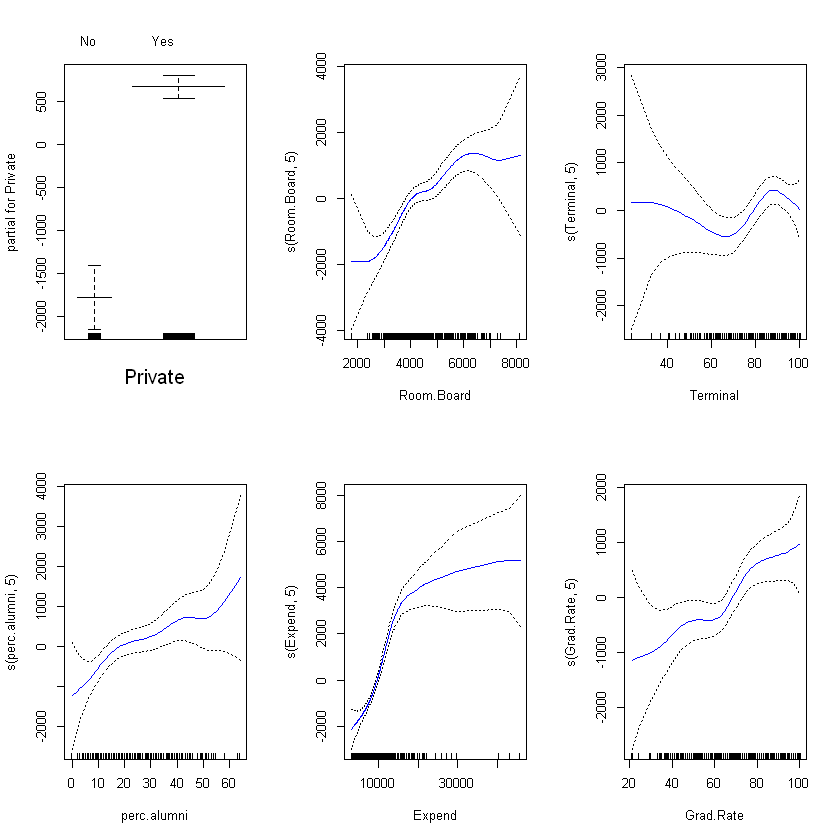

In [31]:
library(gam)
gam.mod <- gam(Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 5) + s(perc.alumni, 5) + s(Expend, 5) + s(Grad.Rate, 5), data = College, subset = train)
par(mfrow = c(2,3))
plot(gam.mod, se = TRUE, col = 'blue')

(c) Evaluate the model obtained on the test set, and explain the results obtained.

In [32]:
preds <- predict(gam.mod, College[test, ])
RSS <- sum((College[test, ]$Outstate - preds)^2) # based on equation (3.16)
TSS <- sum((College[test, ]$Outstate - mean(College[test, ]$Outstate)) ^ 2)
1 - (RSS / TSS)   # based on equation

[1] 0.7762496

(d) For which variables, if any, is there evidence of a non-linear relationship with the response?

In [33]:
summary(gam.mod)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 5) + s(Terminal, 
    5) + s(perc.alumni, 5) + s(Expend, 5) + s(Grad.Rate, 5), 
    data = College, subset = train)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-6805.32  -970.31   -21.18  1137.66  4436.10 

(Dispersion Parameter for gaussian family taken to be 3183818)

    Null Deviance: 6138001825 on 387 degrees of freedom
Residual Deviance: 1149357897 on 360.9999 degrees of freedom
AIC: 6938.864 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 1687025859 1687025859 529.875 < 2.2e-16 ***
s(Room.Board, 5)    1 1310801944 1310801944 411.708 < 2.2e-16 ***
s(Terminal, 5)      1  353882608  353882608 111.150 < 2.2e-16 ***
s(perc.alumni, 5)   1  279484295  279484295  87.783 < 2.2e-16 ***
s(Expend, 5)        1  611402231  611402231 192.034 < 2.2e-16 ***
s(Grad.Rate, 5)     1   65853520   65853520  20.684 7

Expend has a strong relationship while Grad. Rate has a very weak relationship.